In [11]:
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore

In [12]:
df = pd.read_csv("./Cleaned_dataset.csv")
df.drop_duplicates(keep='last', ignore_index=True, inplace=True)
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955



        Duration_in_hours      Days_left           Fare
count      445366.000000  445366.000000  445366.000000
mean           12.182491      25.617822   22919.747165
std             7.299361      14.302610   20394.214040
min             0.750000       1.000000    1307.000000
25%             6.500000      13.000000    8712.000000
50%            11.250000      26.000000   13362.000000
75%            16.333300      38.000000   36980.000000
max            43.583300      50.000000  143019.000000 



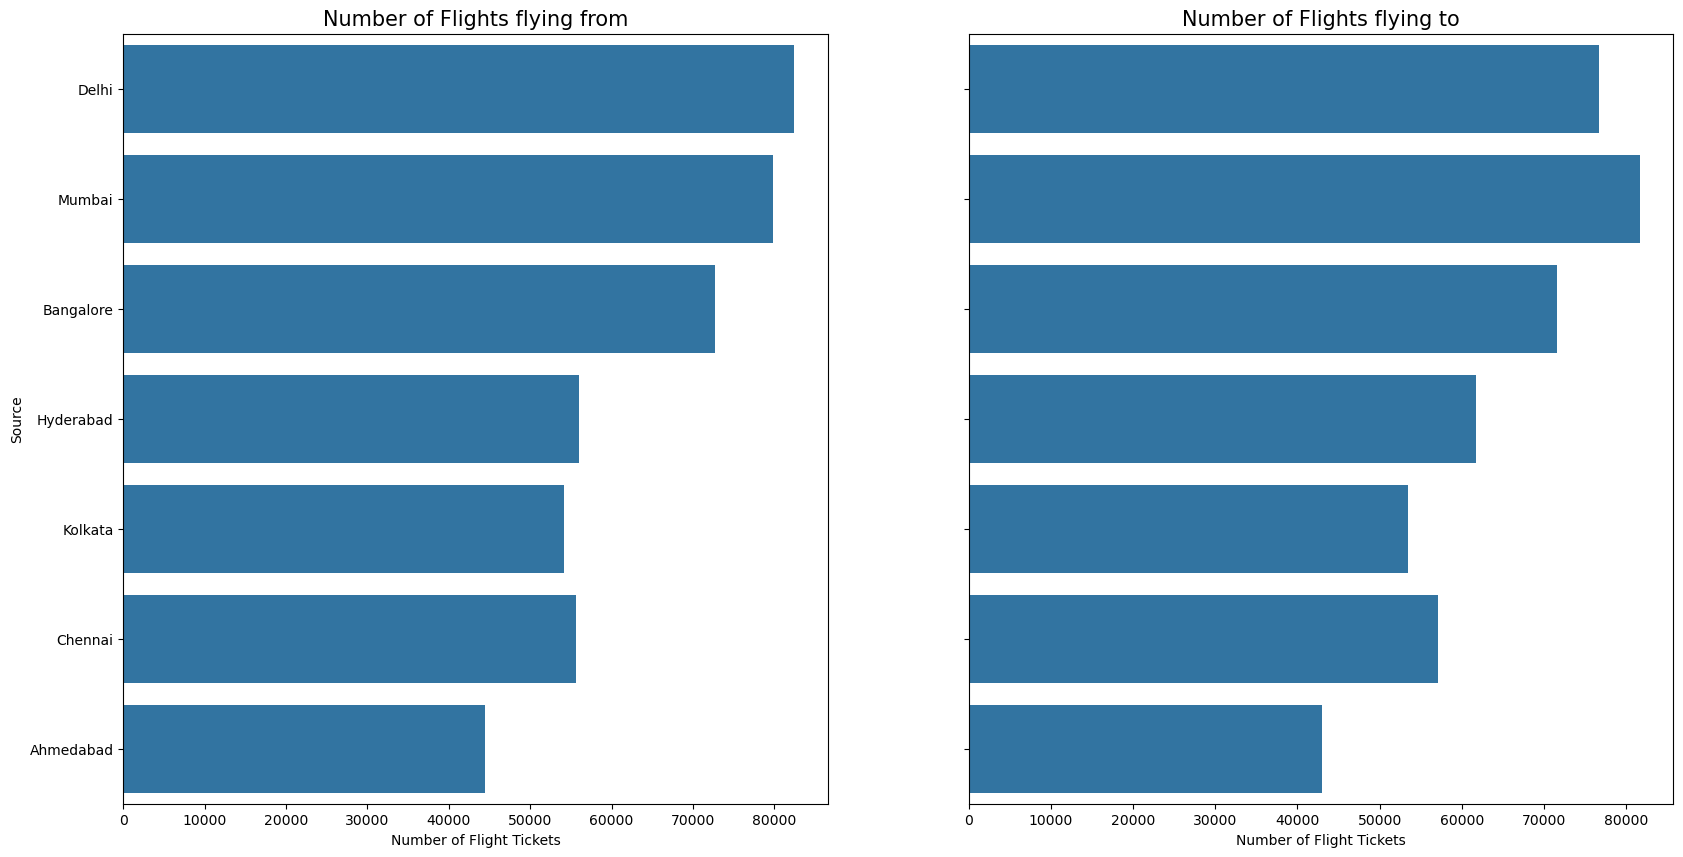

In [13]:

fig,axs = plt.subplots(1,2, figsize=(20,10),sharey=True)
sns.countplot(data=df,y="Source",ax=axs[0])
sns.countplot(data=df,y="Destination",ax=axs[1])
for ax in axs:
    ax.set_xlabel('Number of Flight Tickets')
axs[0].set_title("Number of Flights flying from",size=15)
axs[1].set_title("Number of Flights flying to",size=15)
print('\n',df.describe(), '\n')
plt.show()

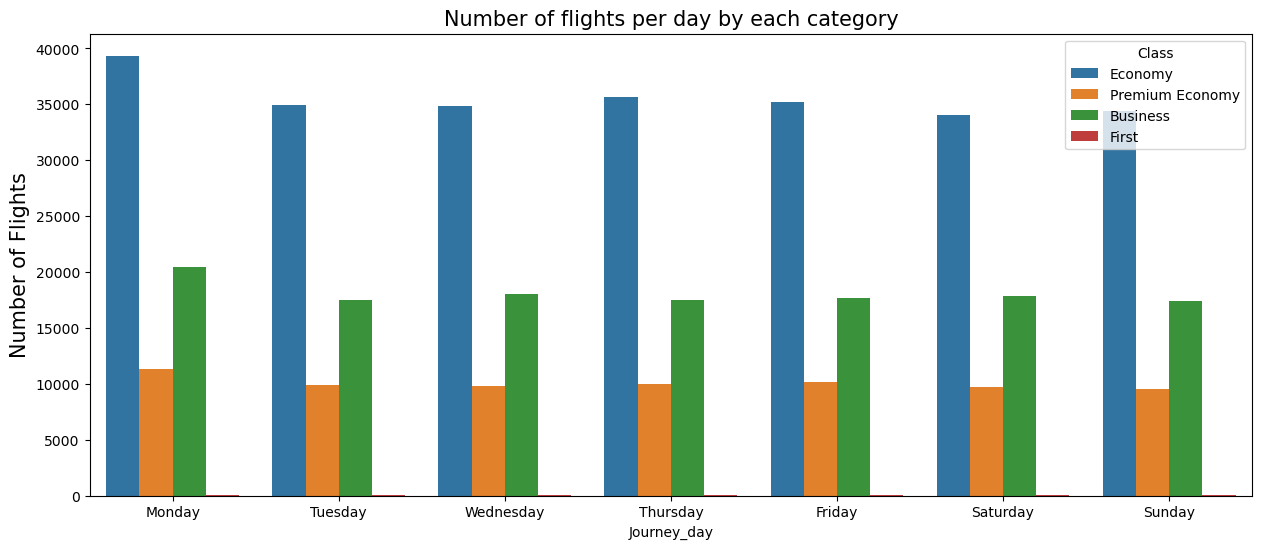

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x=df.Journey_day,hue=df.Class)
plt.ylabel("Number of Flights",size=15)
plt.title("Number of flights per day by each category",size=15)
plt.show()


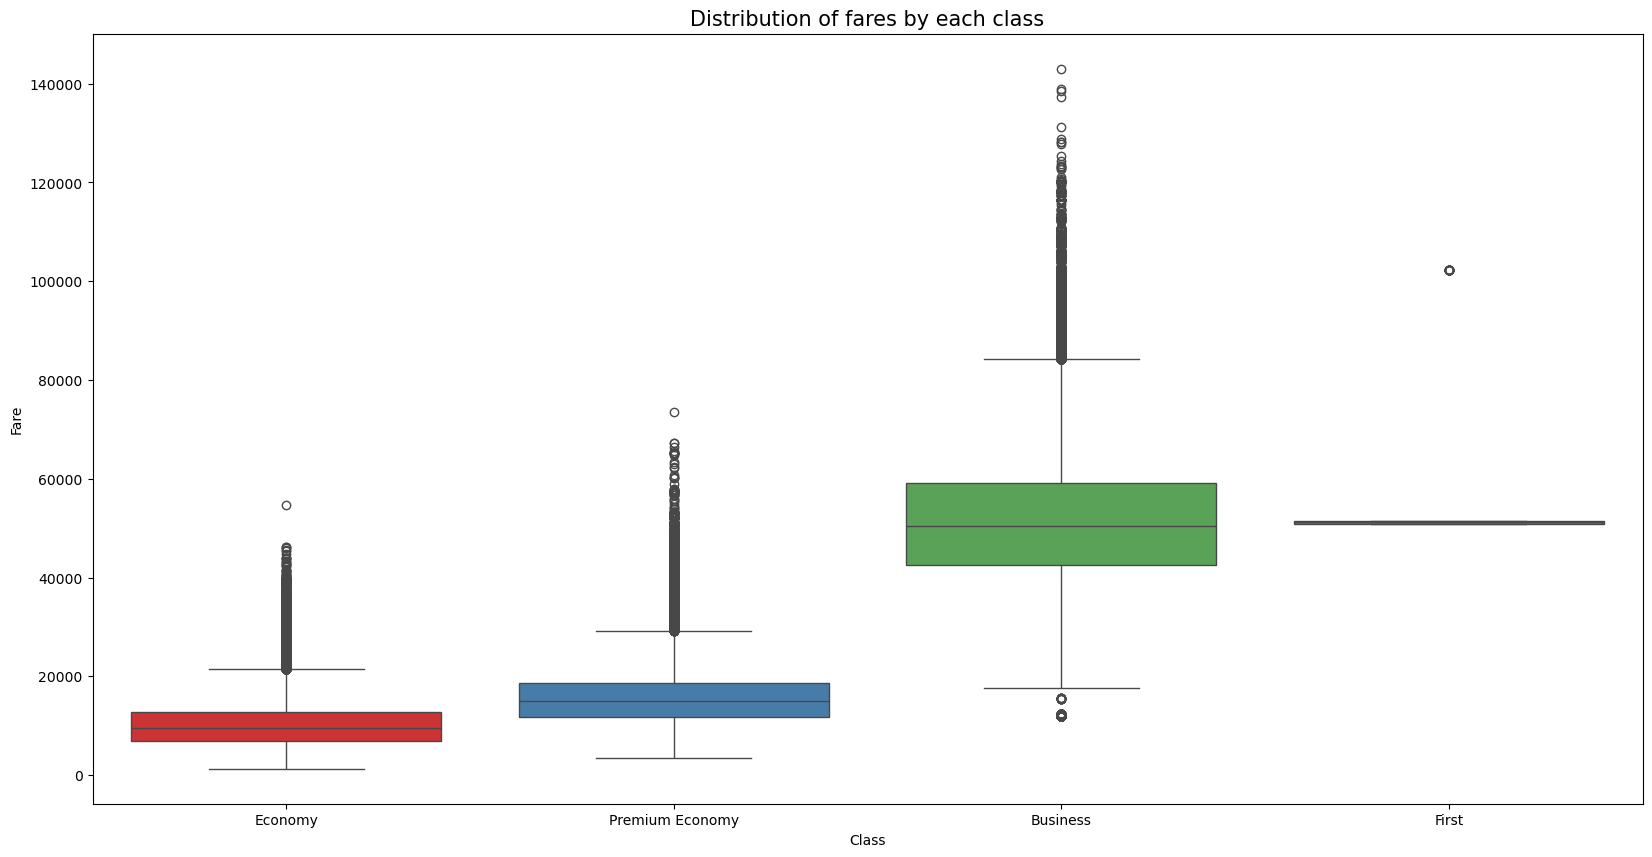

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Class, y=df.Fare, hue=df.Class, palette='Set1')
plt.title("Distribution of fares by each class",size=15)
plt.show()


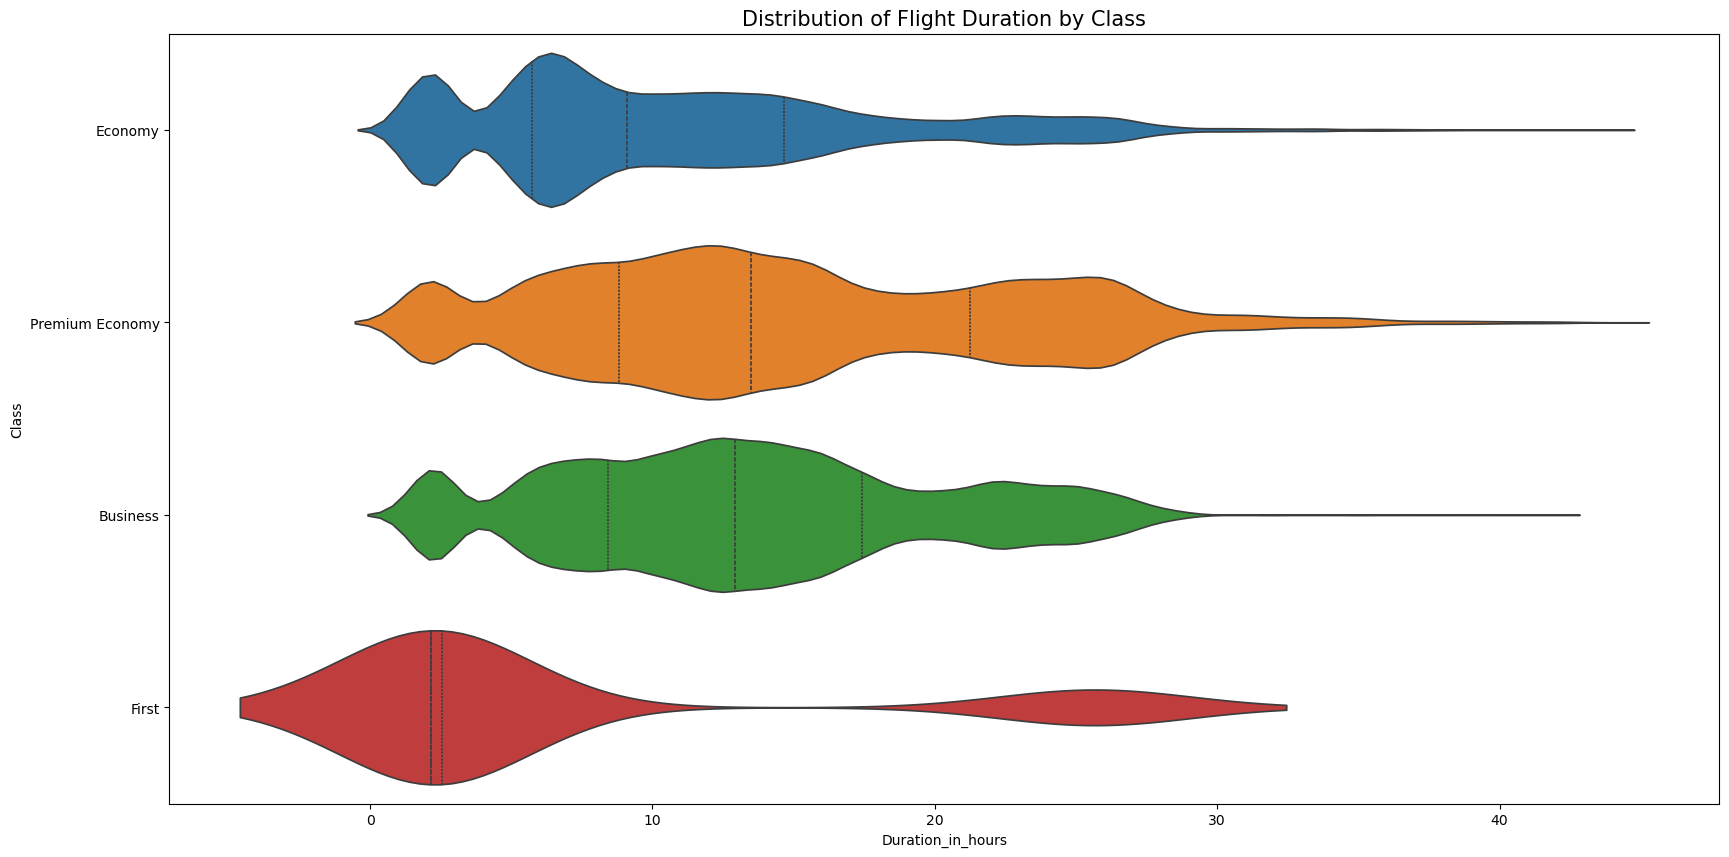

In [16]:
plt.figure(figsize=(20,10))
sns.violinplot(data=df, y="Class", x="Duration_in_hours",inner="quartile", hue=df.Class)
plt.title("Distribution of Flight Duration by Class",size=15)
plt.show()


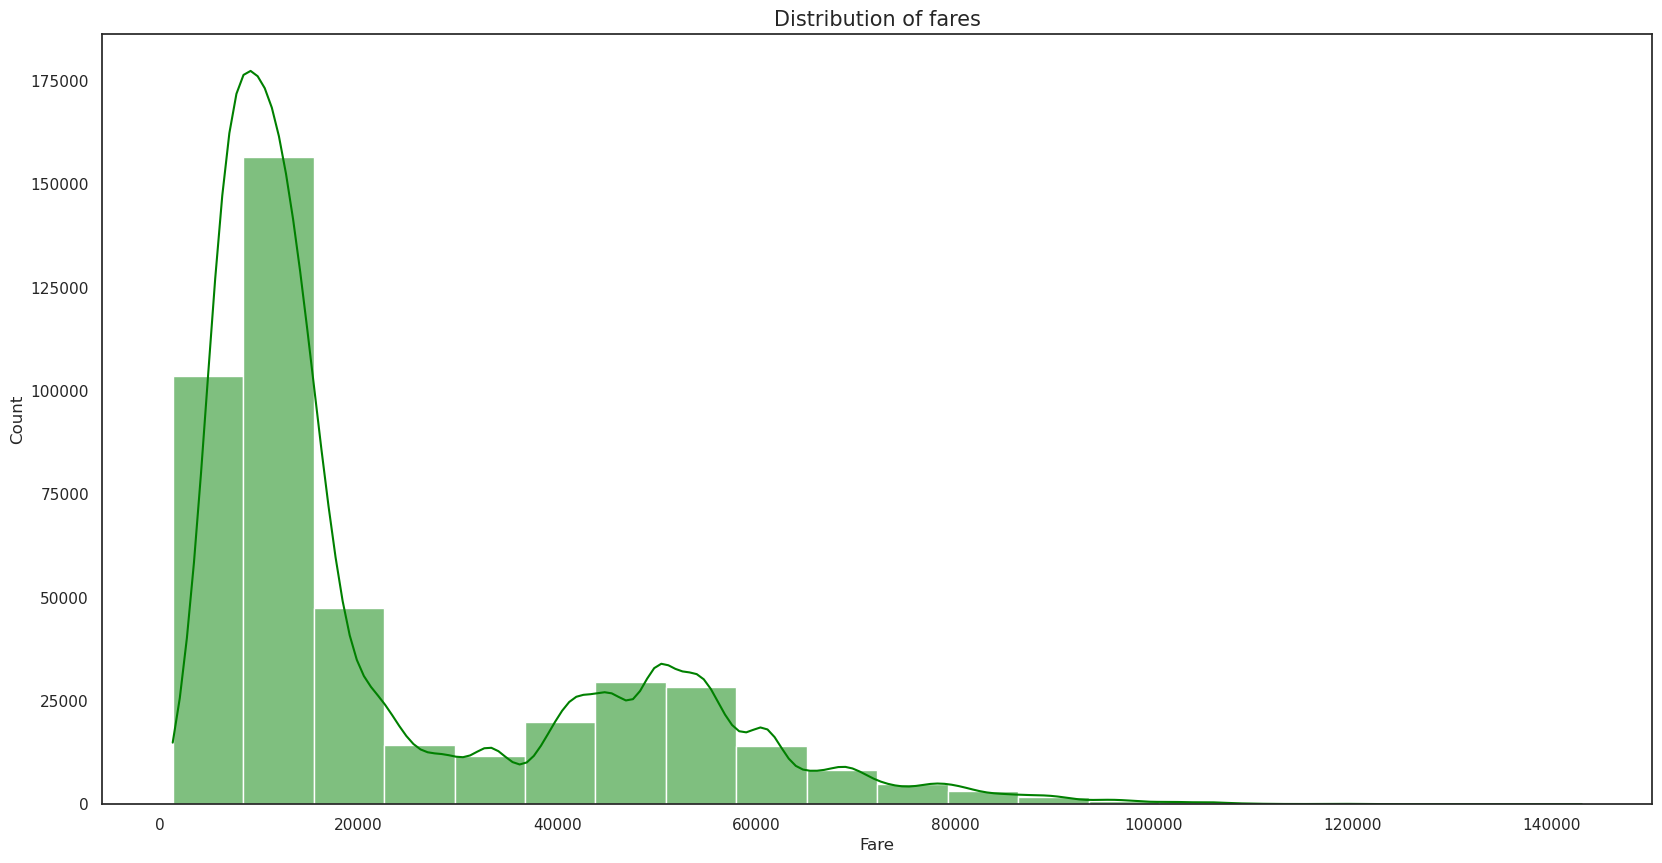

In [30]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare,kde=True,bins=20, color='green')
plt.title("Distribution of fares",size=15)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder # type: ignore

In [18]:
encode = LabelEncoder()
df.Class = encode.fit_transform(df.Class)
df.Journey_day = encode.fit_transform(df.Journey_day)
df.Airline = encode.fit_transform(df.Airline)
df['Flight_code'] = encode.fit_transform(df["Flight_code"])
df.Source = encode.fit_transform(df.Source)
df.Total_stops = encode.fit_transform(df.Total_stops)
df.Destination = encode.fit_transform(df.Destination)
df.Arrival = encode.fit_transform(df.Arrival)
df.Departure = encode.fit_transform(df.Departure)
df.head(20)

{'Business': 0, 'Economy': 1, 'First': 2, 'Premium Economy': 3}
{'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}
{'Air India': 0, 'AirAsia': 1, 'AkasaAir': 2, 'AllianceAir': 3, 'GO FIRST': 4, 'Indigo': 5, 'SpiceJet': 6, 'StarAir': 7, 'Vistara': 8}
{'Ahmedabad': 0, 'Bangalore': 1, 'Chennai': 2, 'Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5, 'Mumbai': 6}
{'1-stop': 0, '2+-stop': 1, 'non-stop': 2}
{'Ahmedabad': 0, 'Bangalore': 1, 'Chennai': 2, 'Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5, 'Mumbai': 6}
{'12 PM - 6 PM': 0, '6 AM - 12 PM': 1, 'After 6 PM': 2, 'Before 6 AM': 3}
{'12 PM - 6 PM': 0, '6 AM - 12 PM': 1, 'After 6 PM': 2, 'Before 6 AM': 3}


,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,1,6,1209,1,3,2,2,2,6,2.0833,1,5335
1,2023-01-16,1,5,164,1,3,2,2,3,6,2.3333,1,5899
2,2023-01-16,1,4,942,1,3,2,2,3,6,2.1667,1,5801
3,2023-01-16,1,6,1224,1,3,2,2,2,6,2.0833,1,5794
4,2023-01-16,1,0,852,1,3,2,2,2,6,2.1667,1,5955
5,2023-01-16,1,0,786,1,3,2,2,2,6,2.2500,1,5955
6,2023-01-16,1,0,859,1,3,2,2,3,6,2.2500,1,5955
7,2023-01-16,1,4,930,1,3,2,2,2,6,2.2500,1,5899
8,2023-01-16,1,6,1174,1,3,2,0,1,6,14.3333,1,5829
9,2023-01-16,1,4,938,1,3,2,2,2,6,2.0833,1,5899


<Axes: >

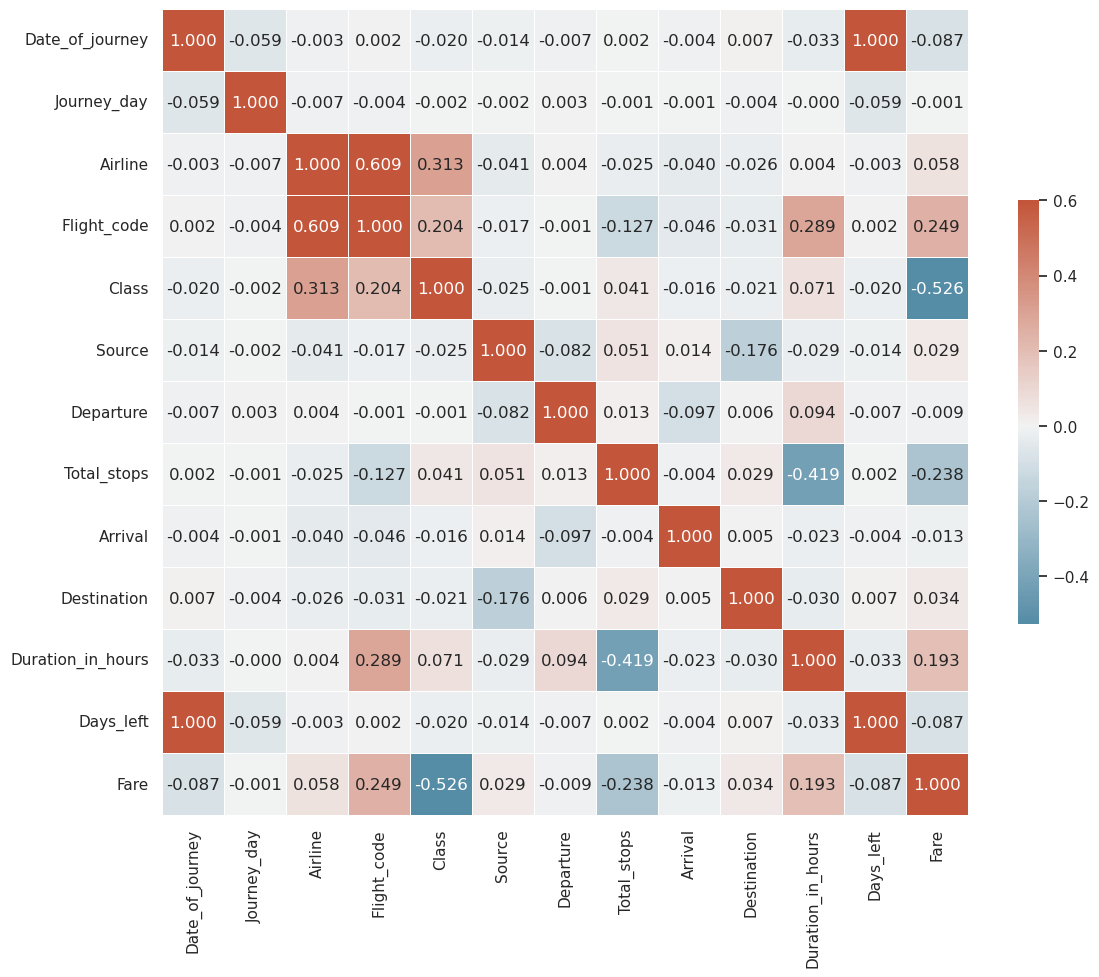

In [19]:
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
corr_matrix = df.corr()
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix,annot=True,fmt='.3f', vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

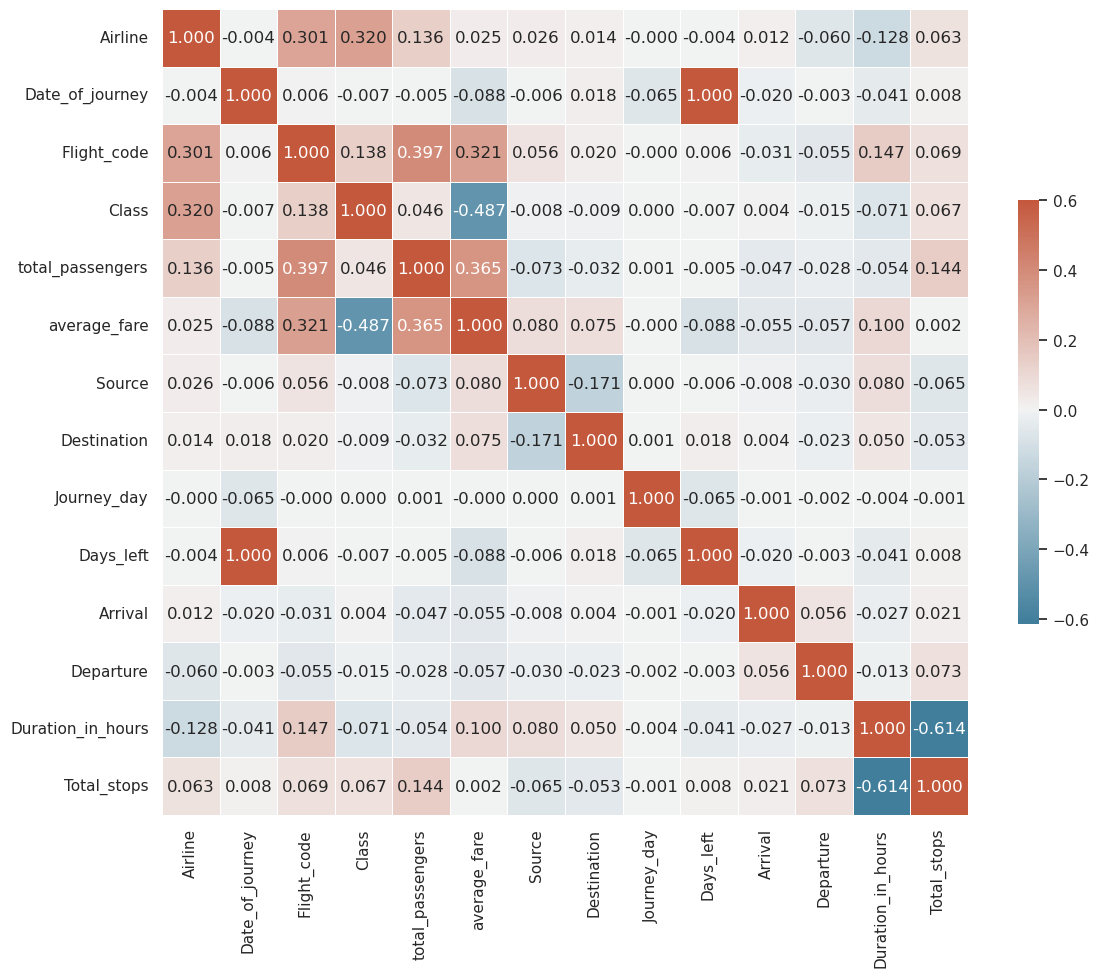

In [21]:
aggregated_df = df.groupby(['Airline', 'Date_of_journey', 'Flight_code', 'Class']).agg(
    total_passengers=('Fare', 'size'),
    average_fare=('Fare', 'mean'),
    Source=('Source', 'first'),
    Destination=('Destination', 'first'),
    Journey_day=('Journey_day', 'first'),
    Days_left=('Days_left', 'mean'),
    Arrival=('Arrival', 'first'),
    Departure=('Departure', 'first'),
    Duration_in_hours=('Duration_in_hours', 'first'),
    Total_stops=('Total_stops', 'first')
).reset_index()

# Rename columns if necessary
aggregated_df.rename(columns={'Fare': 'average_fare'}, inplace=True)

corr_matrix = aggregated_df.corr()

f, ax = plt.subplots(figsize=(13, 11))

sns.heatmap(corr_matrix,annot=True,fmt='.3f', vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
print (dict(zip(encode.classes_,range(len(encode.classes_)))))
